In [2]:
!pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 1.2 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [20]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import numpy as np
import random


In [52]:
file_path = "datasets/US_Accidents_March23.csv"
df = pd.read_csv(file_path)

print(f"Total rows: {df.shape[0]}")

Total rows: 7728394


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 47 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               object        
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

In [53]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')


In [54]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

In [56]:
import seaborn as sns

/Users/yuniktamrakar/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


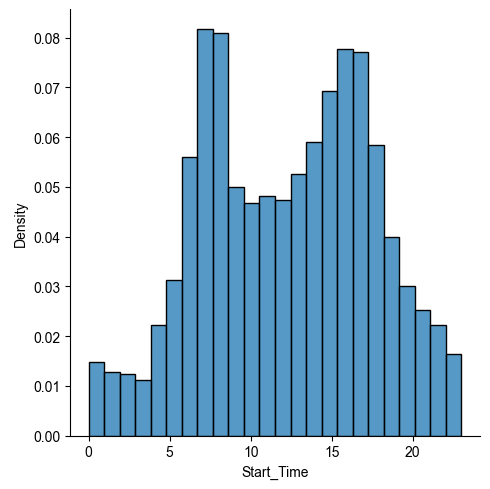

In [59]:
sns.displot(df.Start_Time.dt.hour, bins=24, kde=False, stat='density')

# Adding additional plot customizations
sns.set_style('whitegrid')  # Example: settin

/Users/yuniktamrakar/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


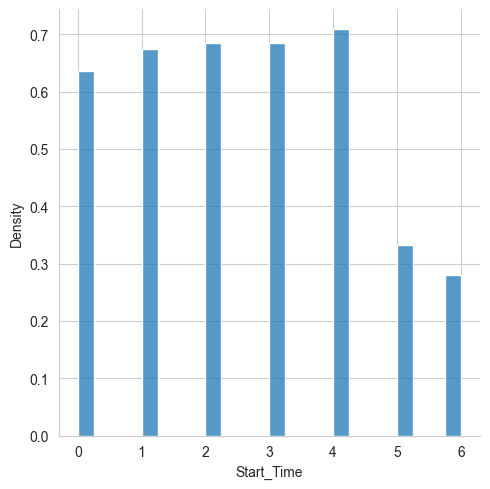

In [60]:
sns.displot(df.Start_Time.dt.dayofweek, bins=24, kde=False, stat='density')

/Users/yuniktamrakar/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


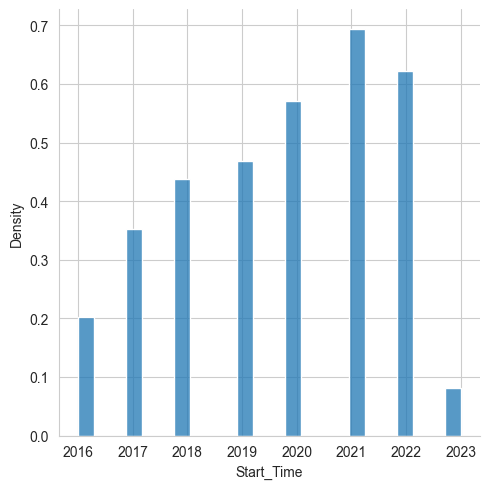

In [61]:
sns.displot(df.Start_Time.dt.year, bins=24, kde=False, stat='density')

# Adding additional plot customizations
sns.set_style('whitegrid')  # Example: settin

In [72]:
# Filter the DataFrame for rows where the year is 2023
df_2021 = df[df.Start_Time.dt.year == 2021]

# df_2016 now contains only the rows from the year 2023


In [73]:
df_2021.shape[0]

1412433

In [41]:
'''file_path = "datasets/US_Accidents_March23.csv"
num_rows = sum(1 for row in open(file_path, 'r', encoding='utf-8')) - 1
sample_size = 20000
skip_rows = sorted(random.sample(range(1, num_rows + 1), num_rows - sample_size)) 


df = pd.read_csv(file_path, skiprows=skip_rows)

df.head()'''

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-361,Source3,3,2016-02-24 06:53:32,2016-02-24 07:23:32,39.788414,-84.183693,NaN,NaN,0.94,...,False,False,False,False,False,False,Night,Day,Day,Day
1,A-397,Source2,2,2016-02-25 16:17:05,2016-02-25 17:02:05,39.819839,-84.189087,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-671,Source2,3,2016-03-16 05:01:05,2016-03-16 05:31:05,39.788414,-84.183693,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-701,Source2,2,2016-03-17 09:08:21,2016-03-17 09:38:21,39.625694,-84.200005,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-1112,Source2,2,2016-06-24 10:50:32,2016-06-24 11:20:32,38.550610,-121.422722,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day


In [74]:
df_loc = df_2021.loc[(~df_2021.Start_Lat.isna()) & (~df_2021.Start_Lng.isna())]

In [23]:
df_loc[['Start_Lat', 'Start_Lng']].describe()

,Start_Lat,Start_Lng
count,20000.000000,20000.000000
mean,36.177636,-94.851819
std,5.061204,17.456781
min,24.575999,-124.420710
25%,33.385700,-117.278825
50%,35.825415,-87.800657
75%,40.055512,-80.384344
max,48.933872,-68.160789


In [75]:
def create_map(df_loc, latitude, longitude, zoom, tiles='OpenStreetMap'):
    """
    Generate a Folium Map with clustered markers of accident locations.
    """
    world_map = folium.Map(location=[latitude, longitude], zoom_start=zoom, tiles=tiles)
    marker_cluster = MarkerCluster().add_to(world_map)

    # Iterate over the DataFrame rows and add each marker to the cluster
    for idx, row in df_loc.iterrows():
        folium.Marker(
            location=[row['Start_Lat'], row['Start_Lng']],
            # You can add more attributes to your marker here, such as a popup
            popup=f"Lat, Lng: {row['Start_Lat']}, {row['Start_Lng']}"
        ).add_to(marker_cluster)

    return world_map

In [76]:
map_us = create_map(df_loc, 39.50, -98.35, 4, tiles="Cartodbdark_matter")
map_us


### Folium doesn't work with 20k+ data points. Let's use KeplerGL

In [27]:
!pip install keplergl
!jupyter nbextension install --py --sys-prefix keplergl
!jupyter nbextension enable --py --sys-prefix keplergl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 1.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 1.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.4/295.4 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 953.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.4 MB/s eta 0:00:0000:0100:01
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=1792

In [79]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager keplergl-jupyter

(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
Building jupyterlab assets (production, minimized)


In [2]:
!jupyter labextension install keplergl-jupyter

(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
/Users/yuniktamrakar/.pyenv/versions/3.10.3/lib/python3.10/site-packages/jupyterlab/debuglog.py:56: UserWarning: An error occurred.
  warnings.warn("An error occurred.")
/Users/yuniktamrakar/.pyenv/versions/3.10.3/lib/python3.10/site-packages/jupyterlab/debuglog.py:57: UserWarning: ValueError: The extension "keplergl-jupyter" does not yet support the current version of JupyterLab.


Conflicting Dependencies:
JupyterLabExtension        Package
>=18.2.0 <19.0.0>=17.0.2 <18.0.0 react
>=18.2.0 <19.0.0>=17.0.2 <18.0.0 react-dom
  warnings.warn(msg[-1].strip())
/Users/yuniktamrakar/.pyenv/versions/3.10.3/lib/python3.10/site-packages/jupyterlab/debuglog.py:58: UserW

In [7]:
from keplergl import KeplerGl
map_1 = KeplerGl()
map_1


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

In [18]:
# Coordinates of the US cities
us_cities_coords = {
    "New York": {"lat": 40.7128, "lon": -74.0060},
    "Los Angeles": {"lat": 34.0522, "lon": -118.2437},
    "Chicago": {"lat": 41.8781, "lon": -87.6298},
    "Houston": {"lat": 29.7604, "lon": -95.3698},
    "Phoenix": {"lat": 33.4484, "lon": -112.0740},
    "Philadelphia": {"lat": 39.9526, "lon": -75.1652},
    "San Antonio": {"lat": 29.4241, "lon": -98.4936},
    "San Diego": {"lat": 32.7157, "lon": -117.1611},
    "Dallas": {"lat": 32.7767, "lon": -96.7970},
    "San Jose": {"lat": 37.3382, "lon": -121.8863},
    "Austin": {"lat": 30.2672, "lon": -97.7431},
    "Jacksonville": {"lat": 30.3322, "lon": -81.6557},
    "Fort Worth": {"lat": 32.7555, "lon": -97.3308},
    "Columbus": {"lat": 39.9612, "lon": -82.9988},
    "San Francisco": {"lat": 37.7749, "lon": -122.4194},
    "Charlotte": {"lat": 35.2271, "lon": -80.8431},
    "Indianapolis": {"lat": 39.7684, "lon": -86.1581},
    "Seattle": {"lat": 47.6062, "lon": -122.3321},
    "Denver": {"lat": 39.7392, "lon": -104.9903},
    "Washington": {"lat": 38.9072, "lon": -77.0369}
}

In [ ]:
map_ny = create_map(
    df_loc, us_cities_coords['New York']['lat'],
    us_cities_coords['New York']['lon'],
    10, tiles="cartodbpositron")
map_ny

In [ ]:
map_ls = create_map(df_loc, 
                    us_cities_coords['Los Angeles']['lat'],
                    us_cities_coords['Los Angeles']['lon'], 
                    10,
                    tiles="Cartodbdark_matter"
                   )
map_ls

In [ ]:
from folium.plugins import HeatMap

def create_heatmap(df_loc, latitude, longitude, zoom, tiles='OpenStreetMap'):
    """
    Generate a Folium Map with a heatmap of accident locations.
    """
    # Create a list of coordinates from the dataframe columns 'Start_Lat' and 'Start_Lng'
    heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in df_loc.iterrows()]

    # Create a map centered around the specified coordinates
    world_map = folium.Map(location=[latitude, longitude], zoom_start=zoom, tiles=tiles)

    # Add the heatmap layer to the map
    HeatMap(heat_data).add_to(world_map)

    return world_map


# Create a heatmap for the entire US using the create_heatmap function
map_us_heatmap = create_heatmap(df_loc.sample(3000), us_cities_coords['Los Angeles']['lat'],
                                us_cities_coords['Los Angeles']['lon']
                                ,  10)

map_us_heatmap

In [ ]:
def create_accident_map(df_loc):
    """Generate a map with CircleMarkers for accident locations."""
    m = folium.Map(location=[39.8283, -98.5795], width="100%", height="100%", zoom_start=4)
    
    for index, row in df_loc.iterrows():
        lat = row['Start_Lat']
        lon = row['Start_Lng']
        
        if not pd.isnull(lat) and not pd.isnull(lon):
            folium.CircleMarker(
                location=[lat, lon],
                radius=1,
                color='blue',
                fill=True,
                fill_color='blue',
                fill_opacity=0.6
            ).add_to(m)

    return m

create_accident_map(df_loc)

In [ ]:
import folium
import pandas as pd

def create_accident_map_with_colors(df_loc):
    """Generate a map with CircleMarkers for accident locations, colored by severity."""
    m = folium.Map(location=[39.8283, -98.5795], width="100%", height="100%", zoom_start=4)
    
    # color scheme for different severity levels 
    severity_colors = {
        1: 'purple',
        2: 'green',
        3: 'orange',
        4: 'red',
    }
    
    for index, row in df_loc.iterrows():
        lat = row['Start_Lat']
        lon = row['Start_Lng']
        severity = row['Severity']
        
        if not pd.isnull(lat) and not pd.isnull(lon) and severity in severity_colors:
            # Get color based on severity
            color = severity_colors[severity]
            
            folium.CircleMarker(
                location=[lat, lon],
                radius=1,
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.6
            ).add_to(m)
    return m

create_accident_map_with_colors(df_loc)